In [1]:
import requests
import zipfile
from tqdm import tnrange, tqdm_notebook
import os
import SimpleITK as sitk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 
import numpy as np
from PIL import Image
import pydicom
from IPython import display
import time
from mpl_toolkits.mplot3d import Axes3D
import copy
matplotlib.rcParams['figure.figsize'] = (20, 12)
import scipy.signal

In [2]:
raw_img_filename= "../data/LNDb-0265.mhd"    # MetaImage (mhd): raw, compressed

In [3]:
raw_img= sitk.ReadImage(raw_img_filename)
# out_img= sitk.ReadImage(out_img_filename)

In [4]:
print("img size: {}".format(raw_img.GetSize()))
print("img origin: {}".format(raw_img.GetOrigin()))
print("img spacing: {}".format(raw_img.GetSpacing()))
print("img width: {}".format(raw_img.GetWidth()))
print("img height: {}".format(raw_img.GetHeight()))
print("img depth: {}".format(raw_img.GetDepth()))
print("img direction: {}".format(raw_img.GetDirection()))

img size: (512, 512, 393)
img origin: (-179.1552734375, -319.1552734375, -206.0)
img spacing: (0.689453125, 0.689453125, 1.0)
img width: 512
img height: 512
img depth: 393
img direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [5]:
# calculate img resolution: with*height
img_resultion= raw_img.GetSize()[0] * raw_img.GetSize()[1]
# or
# img_resolution= raw_img.GetWidth() * raw_img.GetHeight()

img_resultion

262144

In [6]:
raw_np= sitk.GetArrayFromImage(raw_img)
raw_np

array([[[-1024, -1024, -1013, ..., -1002,  -944, -1006],
        [-1022, -1022,  -999, ..., -1003,  -980, -1020],
        [-1016,  -978, -1006, ..., -1004, -1023, -1014],
        ...,
        [-1018,  -959,  -995, ...,  -996,  -982,  -977],
        [-1021, -1018, -1022, ...,  -995, -1007,  -959],
        [-1023, -1023, -1024, ..., -1009, -1017,  -978]],

       [[-1024, -1023, -1011, ...,  -965, -1018, -1015],
        [-1024, -1022,  -991, ..., -1002, -1009,  -991],
        [-1016, -1015,  -965, ..., -1023, -1010,  -995],
        ...,
        [-1021,  -973,  -984, ...,  -991, -1000, -1009],
        [-1023, -1020, -1023, ...,  -959,  -943, -1004],
        [-1024, -1024, -1024, ..., -1012,  -980,  -954]],

       [[-1024, -1024, -1021, ..., -1015, -1024,  -969],
        [-1022, -1022, -1016, ..., -1018, -1012,  -930],
        [-1012,  -967,  -994, ..., -1022,  -985,  -917],
        ...,
        [-1022, -1018, -1021, ..., -1023, -1010,  -988],
        [-1024, -1024, -1001, ...,  -974, -10

In [9]:
assert(raw_np is not None), 'raw cannot be None'
print(raw_np.shape)

(393, 512, 512)


In [10]:
img= raw_np[150, :, :]
print("img shape:", img.shape)
print("img ndim:", img.ndim)
print("img min: {}, max: {}".format(img.min(), img.max()))

img shape: (512, 512)
img ndim: 2
img min: -1024, max: 1997


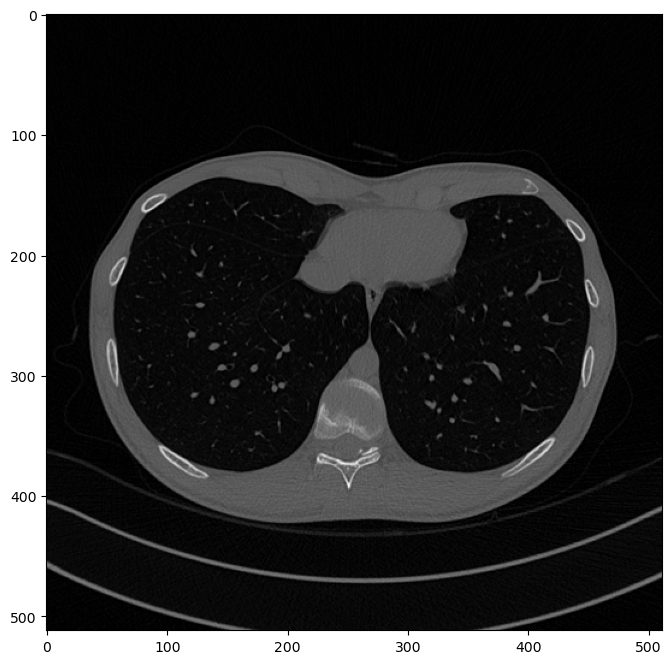

In [13]:
plt.figure(figsize=(12, 8))
plt.imshow(img, cmap='gray')
plt.title= "raw data"
plt.show()